In [13]:
from google.colab import drive

In [14]:
drive.mount("/content/gdrive")

MessageError: ignored

In [15]:
!pip install python-binance
!pip install configparser

In [16]:
import pandas as pd
import numpy as np
from binance.client import Client
from binance import Client, ThreadedWebsocketManager
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import configparser
import matplotlib.pyplot as plt
import time
import math
import os
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from IPython.display import clear_output
from datetime import date, timedelta
import csv
import warnings

In [21]:

"""Either the person enters the coin name or select from a scrolling bar containing all available coins """
""" Either the person enters the time interval or select from a scrolling bar containing all time intervals """
""" It'd be better if there's a bar to choose from for coins and time intervals separately """

""" available_coins_are = ["BNBUSDT", "ETHUSDT", "ADAUSDT", "DOTUSDT", "BTCUSDT", "FTMUSDT", "DOGEUSDT", "LINKUSDT", "SUSHIUSDT", "SOLUSDT",
                 "IOSTUSDT", "LTCUSDT", "XRPUSDT", "SXPUSDT", "MATICUSDT", "BCHUSDT"] """

#coin = str(input("Enter coin name: ").upper())
#time_interval = str(input("Enter time interval name e.g 5m for 5-minute: ").lower())

coin = 'BTCUSDT'
time_interval = '1m'
#symbol = 'BTCUSDT'
#interval = '1m' """



In [22]:


def consume_data(symbol,interval):

  symbol = str(symbol)
  interval = str(interval)

  TEST_API_KEY = 'cmC20L6OdOe6nfS4iD0T3aIYYbGh53G9nsz1kSO4pd5JsVtVbsycpvzxIwN89AEN'
  TEST_SECRET_KEY = 'JjyurQGV0hcbsEhsdUQoaoaeA85kw33xRrEJywhOJfI6ZNUvT42RMkQK1ed59gyh'

  client = Client(TEST_API_KEY, TEST_SECRET_KEY)
  client.API_URL = 'https://testnet.binance.vision/api'  # To change endpoint URL for test account

  # Preparing Start to End period for klines historical data

  td=timedelta(-10)
  time_now = datetime.now()
  start1 = time_now + td
  start = start1.strftime('%Y-%m-%d- %H:%M:%S')



  td_end = timedelta(hours=1)
  Current_Date = datetime.today() + td_end
  end=Current_Date.strftime ('%Y-%m-%d- %H:%M:%S')


  whole_data = []

  klines = client.get_historical_klines(symbol=symbol, interval=interval, start_str=start, end_str=end)
  #print(klines)

  df = pd.DataFrame(klines)
  whole_data.append(df)


  #print(start)
  #print(end)

  df = df.rename(columns={0: 'Open time', 1: 'Open', 2: 'High', 3: 'Low', 4: 'Close', 5: 'Volume',
                                          6: 'Close Time', 7: 'Qoute Asset Volume', 8: 'No of Trades', 9: 'Taker buy',
                                          10: 'Taker buy quote asset volume', 11: 'Coin_Name'})

  df.drop("Coin_Name", axis = 1, inplace = True)

  def convertTime(t):
    t = int(t)
    return datetime.fromtimestamp(t)


  df["Open time"]= df["Open time"]/1000
  df["Open time"] = df["Open time"].apply(convertTime)
  df["Close Time"]= df["Close Time"]/1000
  df["Close Time"] = df["Close Time"].apply(convertTime)

  data = df

  return data




In [23]:
consume_data(coin, time_interval)

,Open time,Open,High,Low,Close,Volume,Close Time,Qoute Asset Volume,No of Trades,Taker buy,Taker buy quote asset volume
0,2023-07-08 21:38:00,30194.49000000,30194.49000000,30192.65000000,30193.56000000,0.65447700,2023-07-08 21:38:59,19760.52280311,15,0.51470400,15540.28841968
1,2023-07-08 21:39:00,30193.56000000,30193.57000000,30175.34000000,30175.34000000,1.96562800,2023-07-08 21:39:59,59324.93784383,66,0.03261500,984.35530036
2,2023-07-08 21:40:00,30175.34000000,30175.66000000,30171.81000000,30171.81000000,0.73702400,2023-07-08 21:40:59,22238.94311849,31,0.07400700,2233.20107922
3,2023-07-08 21:41:00,30171.82000000,30171.82000000,30169.10000000,30169.10000000,0.12200000,2023-07-08 21:41:59,3680.68699764,6,0.00449400,135.58401540
4,2023-07-08 21:42:00,30168.96000000,30168.96000000,30168.94000000,30168.94000000,0.07853800,2023-07-08 21:42:59,2369.40968144,5,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...
14395,2023-07-18 21:33:00,29819.72000000,29821.52000000,29805.67000000,29805.67000000,3.39533400,2023-07-18 21:33:59,101222.71100816,140,0.64604700,19263.67957663
14396,2023-07-18 21:34:00,29805.67000000,29807.69000000,29804.35000000,29804.36000000,0.75628700,2023-07-18 21:34:59,22542.09058773,70,0.61797600,18419.73973460
14397,2023-07-18 21:35:00,29804.35000000,29810.20000000,29804.10000000,29809.00000000,2.42279300,2023-07-18 21:35:59,72215.68976806,115,1.49385500,44528.59712616
14398,2023-07-18 21:36:00,29808.99000000,29810.70000000,29808.85000000,29809.00000000,0.84422400,2023-07-18 21:36:59,25166.01768725,101,0.77568600,23122.96927063


In [ ]:
""" Using LSTM model ""

In [24]:


data = consume_data(coin, time_interval)

#Train-Test split for time-series

test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(data))
test_size = int(test_ratio * len(data))
#print("train_size: " + str(train_size))
#print("test_size: " + str(test_size))

train = data[:train_size][['Close Time', 'Close']]
test = data[train_size:][['Close Time', 'Close']]


# Split the time-series data into training seq X and output value Y
def extract_seqX_outcomeY(dataset, N, offset):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset
        N - window size, e.g., 50 for 50 days of historical stock prices
        offset - position to start the split
    """
    X, y = [], []

    for i in range(offset, len(dataset)):
        X.append(dataset[i-N:i])
        y.append(dataset[i])

    return np.array(X), np.array(y)

In [25]:
layer_units = 50
window_size = 50
optimizer = 50
cur_epochs = 15
cur_batch_size = 20

cur_LSTM_pars = {'units': layer_units,
                     'optimizer': optimizer,
                     'batch_size': cur_batch_size,
                     'epochs': cur_epochs
                     }

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Close']])
scaled_data_train = scaled_data[:train.shape[0]]

# Using past 50 days’ stock prices for our training to predict the 51th day's closing price.
X_train, y_train = extract_seqX_outcomeY (scaled_data_train, window_size, window_size)



In [26]:
# Building LSTM model

def Run_LSTM(X_train, layer_units=layer_units):
    inp = Input(shape=(X_train.shape[1], 1))

    x = LSTM(units=layer_units, return_sequences=True)(inp)
    x = LSTM(units=layer_units)(x)
    out = Dense(1, activation='linear')(x)
    model = Model(inp, out)

    model.compile(loss = 'mean_squared_error', optimizer = 'adam')

    return model

model = Run_LSTM(X_train, layer_units=layer_units)

history = model.fit(X_train, y_train, epochs=cur_epochs, batch_size=cur_batch_size,
                    verbose=1, validation_split=0.1, shuffle=True)

history.save('lstm_on_stock_data_model.h5')

Epoch 1/15
517/517 [==============================] - 35s 58ms/step - loss: 0.0171 - val_loss: 0.0018
Epoch 2/15
517/517 [==============================] - 29s 57ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 3/15
517/517 [==============================] - 29s 56ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 4/15
517/517 [==============================] - 29s 57ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 5/15
517/517 [==============================] - 28s 54ms/step - loss: 0.0029 - val_loss: 7.4486e-04
Epoch 6/15
517/517 [==============================] - 28s 54ms/step - loss: 0.0026 - val_loss: 6.2534e-04
Epoch 7/15
517/517 [==============================] - 28s 54ms/step - loss: 0.0023 - val_loss: 6.1786e-04
Epoch 8/15
517/517 [==============================] - 30s 58ms/step - loss: 0.0022 - val_loss: 4.5946e-04
Epoch 9/15
517/517 [==============================] - 28s 54ms/step - loss: 0.0022 - val_loss: 4.7788e-04
Epoch 10/15
517/517 [==============================] - 28s 55m

AttributeError: ignored

In [27]:
# Predicting stock prices using past window_size stock prices

def preprocess_testdat(data=data, scaler=scaler, window_size=window_size, test=test):
    raw = data['Close'][len(data) - len(test) - window_size:].values
    raw = raw.reshape(-1,1)
    raw = scaler.transform(raw)

    X_test = []
    for i in range(window_size, raw.shape[0]):
        X_test.append(raw[i-window_size:i, 0])

    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test

X_test = preprocess_testdat()

predicted_price_ = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_)

# Plot predicted price vs actual closing price
test['Predictions_lstm'] = predicted_price

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


90/90 [==============================] - 3s 21ms/step


In [34]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score( y_train, predicted_price)
print(f"Accuracy: {accuracy}")


ValueError: ignored

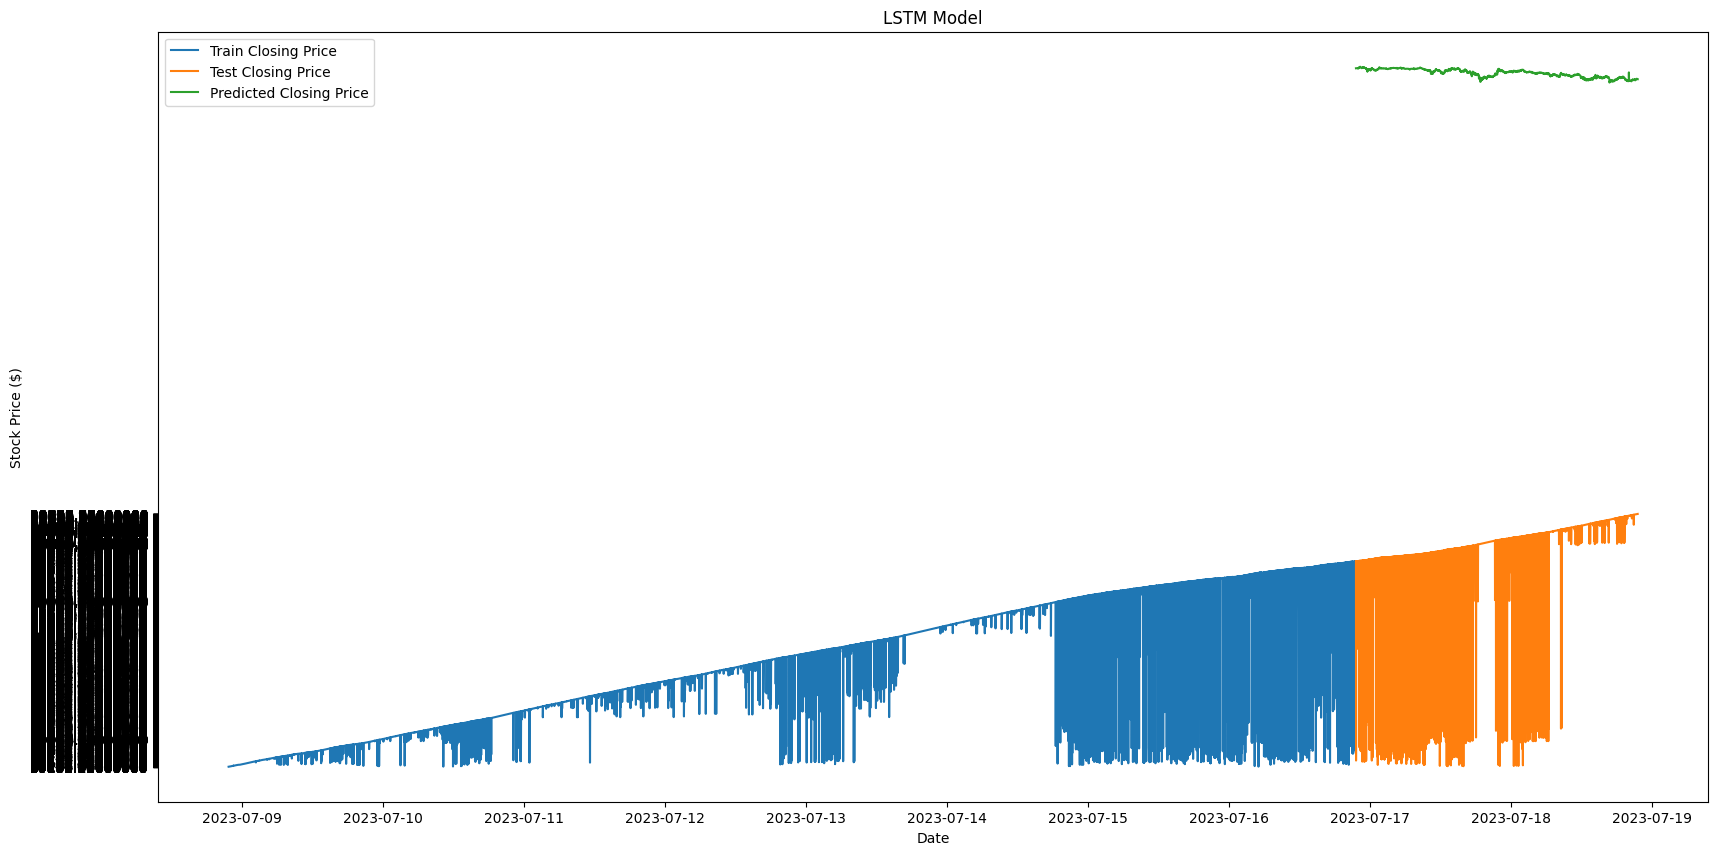

In [28]:
 def plot_stock_trend_lstm(train, test):
    fig = plt.figure(figsize = (20,10))
    plt.plot(train['Close Time'], train['Close'], label = 'Train Closing Price')
    plt.plot(test['Close Time'], test['Close'], label = 'Test Closing Price')
    plt.plot(test['Close Time'], test['Predictions_lstm'], label = 'Predicted Closing Price')
    plt.title('LSTM Model')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend(loc="upper left")

plot_stock_trend_lstm(train, test)

In [29]:
predicted_price

array([[30292.732],
       [30293.771],
       [30293.973],
       ...,
       [29813.135],
       [29816.906],
       [29817.072]], dtype=float32)

In [30]:
predicted_price[0] # first value in the predicted price array

array([30292.732], dtype=float32)

In [31]:
predicted_price[-1] # last value in the predicted price array

array([29817.072], dtype=float32)